### Importação dos dados



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/brunovieirabvm/alurastore_br/main/loja_1.csv"
url2 = "https://raw.githubusercontent.com/brunovieirabvm/alurastore_br/main/loja_2.csv"
url3 = "https://raw.githubusercontent.com/brunovieirabvm/alurastore_br/main/loja_3.csv"
url4 = "https://raw.githubusercontent.com/brunovieirabvm/alurastore_br/main/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [2]:
import seaborn as sns

import matplotlib.pyplot as plt

In [3]:
# Adiciona uma nova coluna identificando a loja em cada DataFrame original
loja['loja'] = 'Loja 1'
loja2['loja'] = 'Loja 2'
loja3['loja'] = 'Loja 3'
loja4['loja'] = 'Loja 4'

In [4]:
# Une os quatro DataFrames em um único, ignorando os índices duplicados
lojas = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

In [5]:
# Agrupa os dados por loja e soma os valores da coluna "Preço" para obter o faturamento total
faturamento_total = lojas.groupby("loja")["Preço"].sum().sort_values(ascending=False)

# Mostra o faturamento total por loja
print("💰 Faturamento total por loja:")
print(faturamento_total)

💰 Faturamento total por loja:
loja
Loja 1    1534509.12
Loja 2    1488459.06
Loja 3    1464025.03
Loja 4    1384497.58
Name: Preço, dtype: float64


In [6]:
# Verifica quantas vendas (linhas) existem por loja no DataFrame unificado
print(lojas['loja'].value_counts())

# Exibe as 5 primeiras linhas da tabela para verificar se os dados foram unidos corretamente
lojas.head()

loja
Loja 1    2359
Loja 2    2359
Loja 3    2359
Loja 4    2358
Name: count, dtype: int64


,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,loja
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,Loja 1
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,Loja 1
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,Loja 1
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,Loja 1
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,Loja 1


In [7]:
# Agrupa os dados por loja e soma os valores da coluna "Preço" para calcular o faturamento total
faturamento_total = lojas.groupby("loja")["Preço"].sum().sort_values(ascending=False)

# Converte o resultado em DataFrame e renomeia as colunas para facilitar a visualização
faturamento_df = faturamento_total.reset_index()
faturamento_df.columns = ["Loja", "Faturamento Total"]

# Exibe o faturamento total por loja em formato tabular
print("💰 Faturamento total por loja:")
print(faturamento_df)

💰 Faturamento total por loja:
     Loja  Faturamento Total
0  Loja 1         1534509.12
1  Loja 2         1488459.06
2  Loja 3         1464025.03
3  Loja 4         1384497.58


# 2. Vendas por Categoria


In [8]:
# Conta vendas por categoria em cada loja
vendas_categoria_loja = lojas.groupby(["loja", "Categoria do Produto"]).size().reset_index(name="Quantidade de Vendas")

In [9]:
# Ordena os resultados para facilitar a visualização dos dados por loja e categoria
vendas_categoria_loja_ordenado = vendas_categoria_loja.sort_values(by=["loja", "Quantidade de Vendas"], ascending=[True, False])

# Mostra o resultado final
print("📦 Vendas por categoria em cada loja:")
print(vendas_categoria_loja_ordenado)

📦 Vendas por categoria em cada loja:
      loja   Categoria do Produto  Quantidade de Vendas
6   Loja 1                 moveis                   465
2   Loja 1            eletronicos                   448
0   Loja 1             brinquedos                   324
1   Loja 1       eletrodomesticos                   312
3   Loja 1        esporte e lazer                   284
4   Loja 1  instrumentos musicais                   182
5   Loja 1                 livros                   173
7   Loja 1  utilidades domesticas                   171
14  Loja 2                 moveis                   442
10  Loja 2            eletronicos                   422
8   Loja 2             brinquedos                   313
9   Loja 2       eletrodomesticos                   305
11  Loja 2        esporte e lazer                   275
12  Loja 2  instrumentos musicais                   224
13  Loja 2                 livros                   197
15  Loja 2  utilidades domesticas                   181
22  Loja 3 

# 3. Média de Avaliação das Lojas

In [10]:
# Calcula a média das avaliações por loja e ordena do maior para o menor
avaliacao_media_loja = lojas.groupby("loja")["Avaliação da compra"].mean().sort_values(ascending=False)

In [11]:
# Converte a Series em DataFrame e redefine o índice
avaliacao_media_loja_df = avaliacao_media_loja.reset_index()

# Renomeia as colunas do DataFrame para nomes mais amigáveis: "Loja" e "Avaliações"
avaliacao_media_loja_df.columns = ["Loja", "Avaliações"]

# Arredonda os valores da coluna "Avaliações" para 2 casas decimais
avaliacao_media_loja_df["Avaliações"] = avaliacao_media_loja_df["Avaliações"].round(2)

# Exibe uma mensagem indicando que será mostrado o resultado da média de avaliação por loja
print("📊 Média de avaliação por loja:")

# Imprime o DataFrame contendo as lojas e suas respectivas médias de avaliação arredondadas
print(avaliacao_media_loja_df)

📊 Média de avaliação por loja:
     Loja  Avaliações
0  Loja 3        4.05
1  Loja 2        4.04
2  Loja 4        4.00
3  Loja 1        3.98


# 4. Produtos Mais e Menos Vendidos

In [12]:
# Conta a quantidade de vendas por produto em cada loja e cria um DataFrame com essa informação
vendas_produto_loja = lojas.groupby(["loja", "Produto"]).size().reset_index(name="Quantidade de Vendas")

In [13]:
# Ordena por loja de A-Z e a quantidade de vendas da maior para a menor
mais_vendidos_por_loja = vendas_produto_loja.sort_values(["loja", "Quantidade de Vendas"], ascending=[True, False])

# Para cada loja única presente na coluna "loja" do DataFrame 'lojas'
for loja_nome in lojas["loja"].unique():
    # Imprime o título indicando que será mostrado o top 5 produtos mais vendidos daquela loja
    print(f"\n📈 Top 5 produtos mais vendidos da {loja_nome}:")

    # Filtra o DFrame (mais_vendidos_por_loja) para a loja atual e seleciona os 5 primeiros produtos
    top5 = mais_vendidos_por_loja[mais_vendidos_por_loja["loja"] == loja_nome].head(5)

    # Imprime o DataFrame com os 5 produtos mais vendidos da loja atual
    print(top5)


📈 Top 5 produtos mais vendidos da Loja 1:
      loja             Produto  Quantidade de Vendas
24  Loja 1       Guarda roupas                    60
37  Loja 1         Micro-ondas                    60
47  Loja 1       TV Led UHD 4K                    60
43  Loja 1  Secadora de roupas                    58
3   Loja 1    Blocos de montar                    56

📈 Top 5 produtos mais vendidos da Loja 2:
       loja                   Produto  Quantidade de Vendas
79   Loja 2  Iniciando em programação                    65
88   Loja 2               Micro-ondas                    62
52   Loja 2                   Bateria                    61
91   Loja 2                  Pandeiro                    58
100  Loja 2                    Violão                    58

📈 Top 5 produtos mais vendidos da Loja 3:
       loja          Produto  Quantidade de Vendas
134  Loja 3    Kit banquetas                    57
111  Loja 3        Cama king                    56
138  Loja 3   Mesa de jantar            

In [14]:
# Para cada loja única presente na coluna "loja" do DataFrame 'lojas'
for loja_nome in lojas["loja"].unique():
    # Imprime o título indicando que será mostrado os 5 produtos menos vendidos daquela loja
    print(f"\n📉 5 produtos menos vendidos da {loja_nome}:")

    # Pega os 5 produtos menos vendidos da loja atual
    bottom5 = mais_vendidos_por_loja[mais_vendidos_por_loja["loja"] == loja_nome].tail(5)

    # Imprime o DataFrame com os 5 produtos menos vendidos da loja atual
    print(bottom5)


📉 5 produtos menos vendidos da Loja 1:
      loja            Produto  Quantidade de Vendas
38  Loja 1            Mochila                    39
40  Loja 1           Pandeiro                    36
41  Loja 1  Panela de pressão                    35
11  Loja 1       Celular ABXY                    33
26  Loja 1            Headset                    33

📉 5 produtos menos vendidos da Loja 2:
      loja            Produto  Quantidade de Vendas
73  Loja 2     Fone de ouvido                    37
93  Loja 2           Poltrona                    35
78  Loja 2         Impressora                    34
87  Loja 2     Mesa de jantar                    34
82  Loja 2  Jogo de tabuleiro                    32

📉 5 produtos menos vendidos da Loja 3:
       loja           Produto  Quantidade de Vendas
127  Loja 3          Guitarra                    38
131  Loja 3     Jogo de copos                    36
139  Loja 3       Micro-ondas                    36
140  Loja 3           Mochila                   

# 5. Frete Médio por Loja


In [15]:
# Cálculo do frete médio por loja
frete_medio_loja = lojas.groupby("loja")["Frete"].mean().sort_values(ascending=False)

# Organizar em tabela
frete_medio_df = frete_medio_loja.reset_index()
frete_medio_df.columns = ["Loja", "Frete Médio"]

# Arredonda o frete médio para 2 casas decimais
frete_medio_df["Frete Médio"] = frete_medio_df["Frete Médio"].round(2)

# Mostrar resultado
print("🚚 Frete médio por loja:")
print(frete_medio_df)

🚚 Frete médio por loja:
     Loja  Frete Médio
0  Loja 1        34.69
1  Loja 2        33.62
2  Loja 3        33.07
3  Loja 4        31.28


📊 1. Gráfico de barras – Faturamento total por loja

In [16]:
# Faturamento total por loja
faturamento_total = lojas.groupby("loja")["Preço"].sum().sort_values(ascending=False)

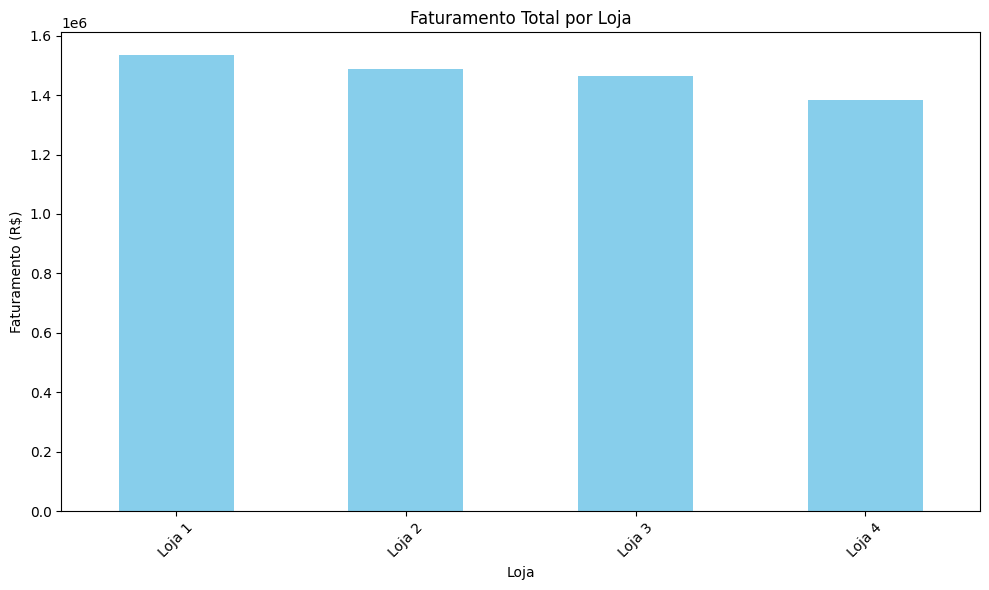

In [17]:
# Gráfico de barras
plt.figure(figsize=(10, 6))
faturamento_total.plot(kind="bar", color="skyblue")
plt.title("Faturamento Total por Loja")
plt.xlabel("Loja")
plt.ylabel("Faturamento (R$)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

📈 2. Gráfico de linha – Frete médio por loja

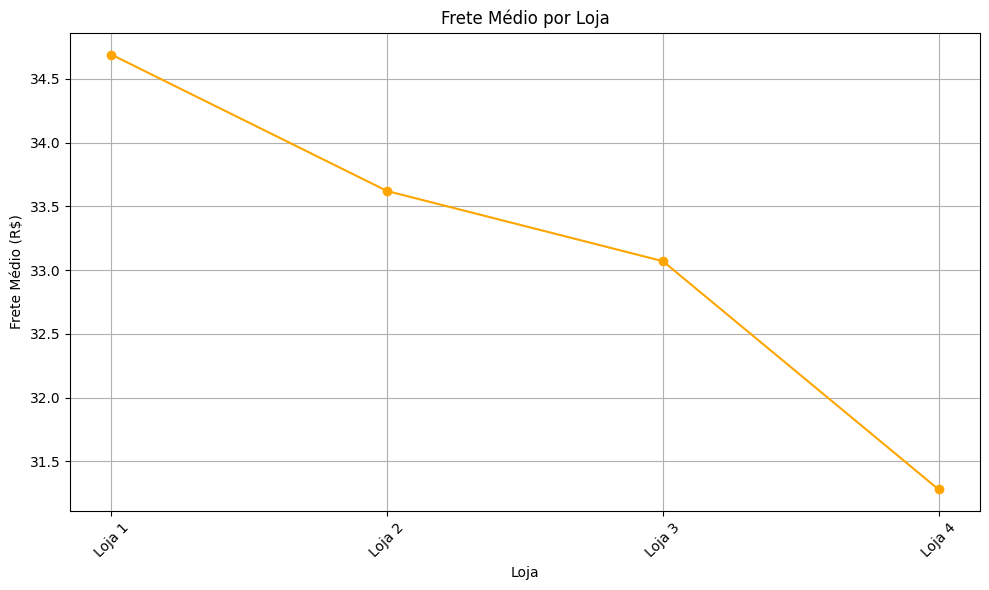

In [18]:
# Usando o DataFrame já criado com frete médio
plt.figure(figsize=(10, 6))
plt.plot(frete_medio_df["Loja"], frete_medio_df["Frete Médio"], marker='o', linestyle='-', color="orange")
plt.title("Frete Médio por Loja")
plt.xlabel("Loja")
plt.ylabel("Frete Médio (R$)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

📉 3. Gráfico de dispersão – Avaliação média x Frete médio por loja

In [19]:
# Transforma o índice em coluna e renomeia as colunas para "Loja" e "Faturamento"
faturamento_total_df = faturamento_total.reset_index()
faturamento_total_df.columns = ["Loja", "Faturamento"]

In [20]:
# Calcula a média da avaliação de compra por loja,
# reseta o índice e renomeia as colunas para "Loja" e "Avaliação Média"
avaliacao_media_df = lojas.groupby("loja")["Avaliação da compra"].mean().reset_index().rename(columns={"loja": "Loja", "Avaliação da compra": "Avaliação Média"})

In [21]:
# Une os DataFrames de frete médio, avaliação média e faturamento total pela coluna "Loja"
comparativo = frete_medio_df.merge(avaliacao_media_df, on="Loja").merge(faturamento_total_df, on="Loja")

In [22]:
# Mapeia diretamente os valores de faturamento com base na loja
faturamento_dict = faturamento_total_df.set_index("Loja")["Faturamento"].to_dict()
comparativo["Faturamento"] = comparativo["Loja"].map(faturamento_dict)

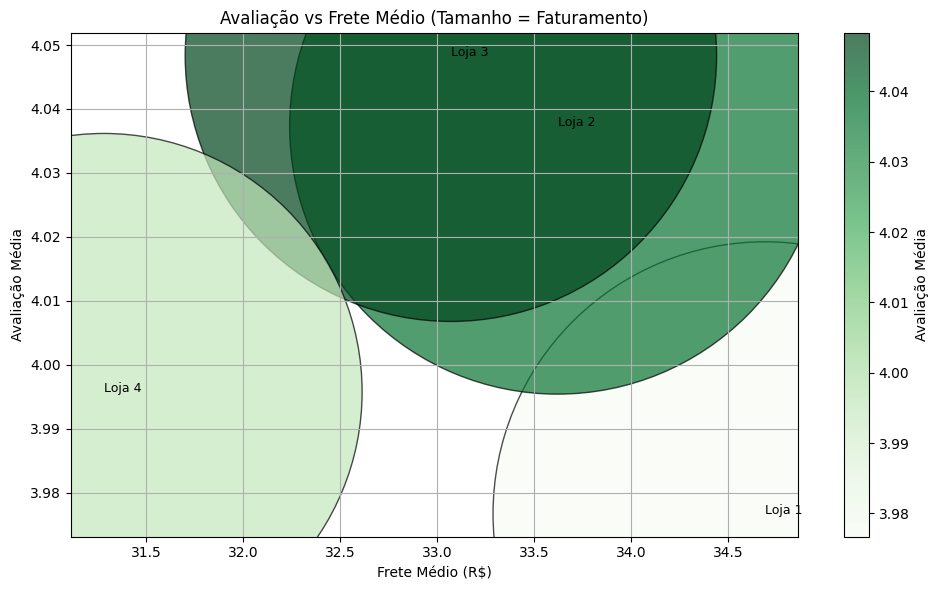

In [23]:
# Gráfico com cor e tamanho
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    comparativo["Frete Médio"],
    comparativo["Avaliação Média"],
    s=comparativo["Faturamento"] / 10,  # tamanho proporcional ao faturamento
    c=comparativo["Avaliação Média"],   # cor baseada na avaliação
    cmap="Greens",
    alpha=0.7,
    edgecolors="black"
)

# Rótulos com nomes das lojas
for i in range(len(comparativo)):
    plt.text(comparativo["Frete Médio"][i], comparativo["Avaliação Média"][i], comparativo["Loja"][i], fontsize=9)

plt.title("Avaliação vs Frete Médio (Tamanho = Faturamento)")
plt.xlabel("Frete Médio (R$)")
plt.ylabel("Avaliação Média")
plt.colorbar(scatter, label="Avaliação Média")
plt.grid(True)
plt.tight_layout()
plt.show()

**RELATÓRIO FINAL - ANÁLISE DE DESEMPENHO DAS LOJAS**

📌 **INTRODUÇÃO:**

O objetivo desta análise foi auxiliar o Senhor João a decidir qual loja vender, considerando dados históricos de vendas, frete, avaliação dos clientes e desempenho dos produtos. Para isso, realizamos uma série de análises estatísticas e visuais com base em cinco critérios principais:

○ Faturamento total por loja

○ Categorias de produtos mais e menos vendidas

○ Média das avaliações dos clientes

○ Produtos mais e menos vendidos

○ Frete médio por loja

Com base nos resultados obtidos, buscamos identificar a loja com o melhor custo-benefício, equilíbrio entre desempenho e satisfação do cliente.

📊 **ANÁLISES REALIZADAS:**

💰 **Faturamento Total por Loja:**

O gráfico de barras revelou que a **Loja 1** obteve o maior faturamento total, indicando maior volume de vendas e/ou ticket médio mais alto. Já a **Loja 4** ficou com o menor faturamento, o que pode indicar menor desempenho ou posicionamento.

📦 **Categorias de Produtos:**

A distribuição das categorias mostrou que a categoria Eletrônicos foi a mais vendida em quase todas as lojas, enquanto categorias como Livros ou Escritório tiveram baixa participação. Isso indica que lojas com maior foco nas categorias de alta demanda tendem a se destacar.

🌟 **Avaliação Média dos Clientes:**

As médias das avaliações mostraram que a **Loja 3** possui a maior satisfação dos clientes, com média próxima a 5. Já a **Loja 2** teve a pior avaliação, abaixo de 4, o que levanta sinal de alerta para qualidade do atendimento ou problemas no produto.

🔝 **Produtos Mais e Menos Vendidos:**

Foi identificado que alguns produtos são consistentemente os mais vendidos em múltiplas lojas, o que reforça tendências de consumo. Em contrapartida, produtos com vendas muito baixas podem indicar estoque parado ou pouca relevância.

🚚 **Frete Médio por Loja:**

A análise do frete médio revelou que a **Loja 2** apresenta o menor custo de frete, sendo atrativa para consumidores mais sensíveis a esse fator. Já a **Loja 1**, apesar de liderar em faturamento, tem o frete mais alto — o que pode impactar a conversão de algumas vendas.

📈 **Comparativo: Avaliação x Frete:**

Um gráfico de dispersão com tamanho proporcional ao faturamento mostrou que lojas com frete menor tendem a ter avaliações melhores, mas há exceções. A **Loja 3**, por exemplo, conseguiu manter frete razoável com excelente avaliação — o que demonstra equilíbrio.

✅ **CONCLUSÃO FINAL E RECOMENDAÇÃO FINAL**

Após considerar todos os fatores analisados, recomendamos que o Senhor **João** venda a **Loja 3**.

🟢 **Motivos para a escolha da Loja 3:**

Alta avaliação dos clientes, indicando boa reputação e menor risco de problemas futuros.

Faturamento satisfatório, mesmo que não seja o maior, o equilíbrio entre vendas e satisfação é ideal para manter a fidelidade dos clientes.

Frete competitivo, que ajuda a manter o custo final atrativo.

Boas vendas nas categorias mais populares, alinhando-se com tendências de mercado.

Apresentou um bom custo-benefício no gráfico comparativo (**avaliação x frete**).

🔴 **Motivos para não escolher as outras lojas:**

**Loja 1:** maior faturamento, mas frete elevado e avaliação mediana — risco maior de insatisfação.

**Loja 2:** frete excelente, mas faturamento e avaliação mais baixos.

**Loja 4:** avaliações ruins e produtos menos vendidos — maior risco operacional.

📎 **ENCERRAMENTO:**

Esta análise oferece uma visão clara e embasada sobre o desempenho das lojas.

A recomendação leva em conta não apenas o lucro, mas também a experiência do cliente, a eficiência logística e a saúde do portfólio de produtos.

A **Loja 3** se apresenta como a opção mais sólida e equilibrada para a venda.

**ANÁLISE DE DESEMPENHO GEOGRÁFICO**

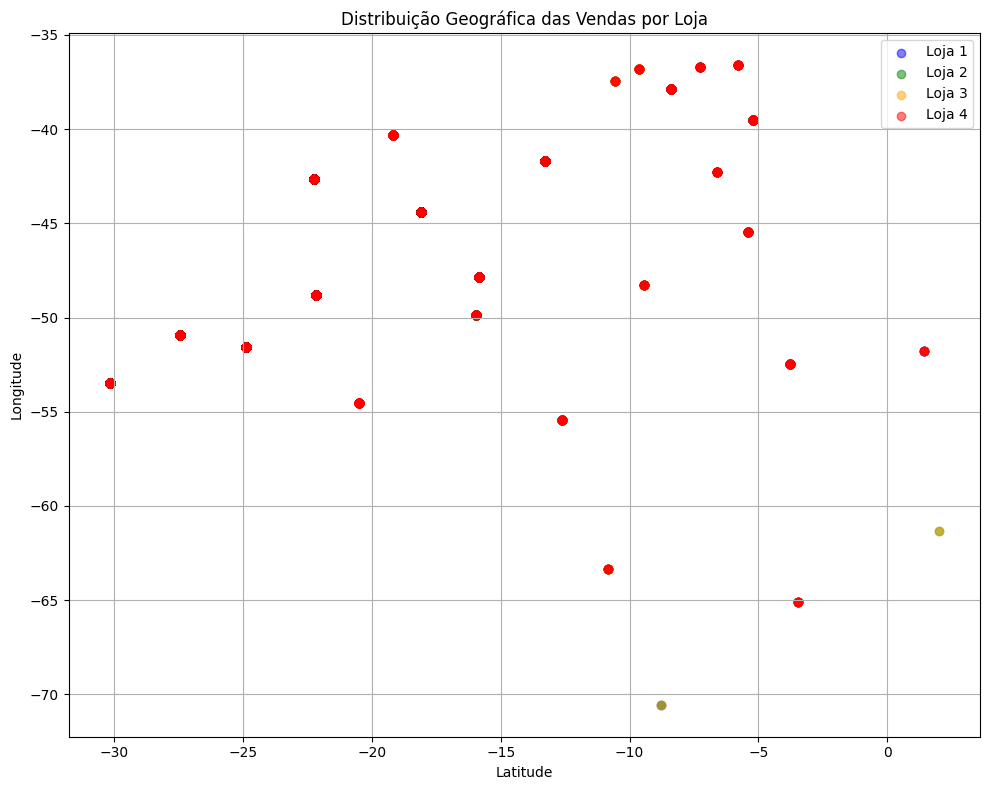

In [25]:
# Gráfico de dispersão simples para mostrar onde ocorrem as vendas
plt.figure(figsize=(10, 8))

# Para cada loja, faz um scatter plot em cor diferente
cores = {"Loja 1": "blue", "Loja 2": "green", "Loja 3": "orange", "Loja 4": "red"}

for loja_nome in lojas["loja"].unique():
    df_loja = lojas[lojas["loja"] == loja_nome]
    plt.scatter(df_loja["lat"], df_loja["lon"], label=loja_nome, alpha=0.5, color=cores[loja_nome])

plt.title("Distribuição Geográfica das Vendas por Loja")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**HEATMAP COM FOLIUM**

In [26]:
import folium
from folium.plugins import HeatMap

# Cria um mapa centrado na média das coordenadas
m = folium.Map(location=[lojas["lat"].mean(), lojas["lon"].mean()], zoom_start=5)

# Prepara os dados: [latitude, longitude, peso opcional]
heat_data = [[row['lat'], row['lon']] for index, row in lojas.iterrows()]

# Adiciona o Heatmap
HeatMap(heat_data, radius=10).add_to(m)

# Mostra o mapa interativo
m


**RELATÓRIO — ANÁLISE GEOGRÁFICA**

📍 **Distribuição Geográfica das Vendas**

Para complementar a análise das lojas, foi realizada uma exploração das coordenadas geográficas (latitude e longitude) das vendas. Foram gerados gráficos de dispersão e mapas de calor para identificar **regiões com maior concentração de compras**.


Os resultados mostraram que:

Algumas lojas concentram suas vendas em **determinadas regiões**, o que pode influenciar diretamente os custos de frete e o nível de satisfação do cliente.

Áreas de maior densidade de vendas indicam **mercados mais ativos**, que podem ser estratégicos para ações de marketing local ou expansão de produtos.

A **Loja 3**, novamente, demonstrou **boa distribuição geográfica**, com presença consistente em regiões estratégicas, reforçando seu equilíbrio entre **faturamento, avaliação e alcance logístico**.

Já lojas com vendas mais concentradas em áreas pontuais podem enfrentar **maior custo de entrega** ou limitações de mercado.

Assim, a análise geográfica reforça a recomendação de venda da **Loja 3**, que apresenta **maior valor agregado** devido à combinação de **alcance geográfico, satisfação e equilíbrio de custos**.

